In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
np.random.seed(seed=42)

A company selling batteries claims that the average life for its batteries before a recharge is necessary is at least 100 hours. The data is in the file batteries.csv. One of its clients wanted to verify this claim by testing 48 batteries. Is the company’s claim correct at the alpha=5% level?

In [5]:
df = pd.read_csv('batteries.csv', header=None)
df.columns = ['battery_life']

In [8]:
df

,battery_life
0,137.0
1,73.0
2,99.0
3,113.0
4,96.0
5,135.0
6,111.0
7,83.0
8,74.0
9,68.0


In [38]:
# Calculate the mean and the standard deviation of the sample
mean = np.mean(df['battery_life'])
std = np.std(df['battery_life'], ddof=1)
print(mean)
print(std)

103.8125
23.958879888924585


## WITHOUT Converting to Z score for standard Normal Curve

via CLT, assume normality of the sampling distribution of the sample mean

Under null hypothesis, we assume that mean is drawn from a normal distribution
with mean = 100 and std error = std/math.sqrt(48)

In [50]:

# Compute the cutoff for the null hypothesis of mean = 100

# if the sample mean is above the cutoff, reject the null.
# if the sample mean is below the cutoff, fail to reject the null.

std_error = std/math.sqrt(48)
cutoff = stats.norm.ppf(.95,loc=100, scale=std_error)
cutoff

105.68817760870233

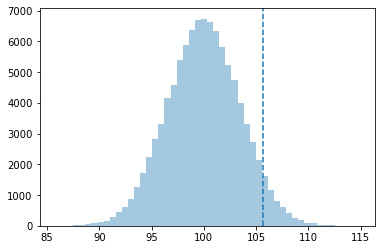

In [35]:
r = stats.norm.rvs(loc=100, scale=std_error, size=100000)

plt.axvline(cutoff, 0,1, linestyle='--')
sns.distplot(r, kde=False)

In [51]:
print(f'since mean = {mean} < {cutoff}, fail to reject the null hypothesis!!')

since mean = 103.8125 < 105.68817760870233, fail to reject the null hypothesis!!


## Using Z score

In [41]:
test_stat = (mean - 100)/math.sqrt(48)
test_stat

0.5502869753213621

In [45]:
z_cutoff = stats.norm.ppf(.95)
z_cutoff

1.6448536269514722

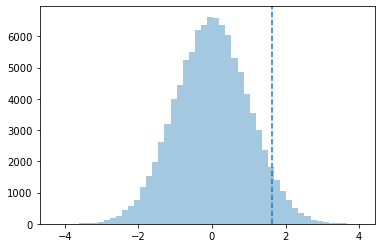

In [46]:
r = stats.norm.rvs(size=100000)

plt.axvline(z_cutoff, 0,1, linestyle='--')
sns.distplot(r, kde=False)

In [48]:
print(f'since test_stat = {test_stat} < {z_cutoff}, fail to reject the null hypothesis!!')

since test_stat = 0.5502869753213621 < 1.6448536269514722, fail to reject the null hypothesis!!
